In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
pd.options.mode.chained_assignment = None  # default='warn'

# Lyft Data Challenge
## Team BowTieBoys
#### Jacob Lebowitz
#### Tiger Gamble

# Need to build dataset with: 
INDEX: Driver ID  <br>
COLUMNS:  <br>
    1) onboard_date <br>
    2) total miles driven in a week <br>
    3) total time driven in a week <br>
    4) ride prime time given in a week <br>
    5) How many rides had prime time <br>
    5) money made in a week <br>
    6) time wasted from appected_at to arrived_at <br>
    7) Money made from accepted at to dropped of at <br>
    8) money made from pickedup at to dropped of at <br>


In [2]:
# Driver data
driver_df = pd.read_csv('driver_ids.csv')
driver_df['driver_onboard_date'] =  pd.to_datetime(driver_df['driver_onboard_date'])
driver_df.sort_values(by='driver_onboard_date', ascending=True, inplace=True)

# Ride data
ride_df = pd.read_csv('ride_ids.csv')
# Converting ride distance from meters to miles
ride_df['ride_distance'] = ride_df['ride_distance'].apply(lambda x: x * 0.000621371192)
# Converting ride duration from seconds to minutes
ride_df['ride_duration'] = ride_df['ride_duration'].apply(lambda x: x / 60)

# Timestamp data
timestamps_df = pd.read_csv('ride_timestamps.csv')
timestamps_df['timestamp'] =  pd.to_datetime(timestamps_df['timestamp'])

In [3]:
# 937 unique drivers
# all drivers have onboard dates
driver_df.head()

,driver_id,driver_onboard_date
432,72ca99bb6667024a23e1f68904b06fd0,2016-03-28
907,f86eb77e1cefe28e9f0e9d3775fae261,2016-03-28
107,1e9b964b3e3d0289794289579269247a,2016-03-28
895,f1b4411717c78f67380366c2a16a4d1e,2016-03-28
889,f0df79d10df44f18742682108b17f60a,2016-03-28


In [4]:
# 937 unique
# 193,502 unqiue Rides
ride_df.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1.125303,5.450000,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,2.089050,13.483333,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,2.039340,9.533333,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,40.564976,55.633333,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,2.556942,13.716667,100


In [5]:
# Timestamp is missing one datapoint
# Need to delete the entire ride because of missing timestamp for event
# 194,081 unique rides
# 970,405 different event entries
timestamps_df.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [6]:
# Finding the ride where timestamp has a missing value
timestamps_df[timestamps_df['timestamp'].isnull()]

,ride_id,event,timestamp
434222,72f0fa0bd86800e9da5c4dced32c8735,arrived_at,NaT


In [7]:
# Removing that ride from the dataframe
timestamps_df = timestamps_df[timestamps_df['ride_id'] != '72f0fa0bd86800e9da5c4dced32c8735']

In [8]:
# 194,080 different rides 
# 970,400 different event entries
timestamps_df.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [9]:
# Merging timestamps_df and ride_df while removing all rides that are not 1:1 matches
all_ride_data_df = timestamps_df.merge(ride_df, on='ride_id', how='inner') 

In [10]:
# 844 drivers
# 924,090 different event entries
# 184,818 different rides
all_ride_data_df.head()

,ride_id,event,timestamp,driver_id,ride_distance,ride_duration,ride_prime_time
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0


In [11]:
# Merging ride_df and driver_df while removing all drivers that are not 1:1 matches 
# Building total ride duration, distance, and prime time colums as well
all_driver_data_df = ride_df.copy() 

all_driver_data_df = all_driver_data_df.merge(driver_df, on='driver_id', how='inner')
all_driver_data_df['total_distance'] = all_driver_data_df.groupby('driver_id')['ride_distance'].transform('sum')
all_driver_data_df['total_duration'] = all_driver_data_df.groupby('driver_id')['ride_duration'].transform('sum')
all_driver_data_df['total_prime_time'] = all_driver_data_df.groupby('driver_id')['ride_prime_time'].transform('sum')
all_driver_data_df.drop(['ride_id', 'ride_distance', 'ride_duration', 'ride_prime_time'], axis=1, inplace=True)
all_driver_data_df = all_driver_data_df.drop_duplicates('driver_id')

In [12]:
# 854 unique drivers
all_driver_data_df.head()

,driver_id,driver_onboard_date,total_distance,total_duration,total_prime_time
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,1081.364208,3687.300000,5375
277,007f0389f9c7b03ef97098422f902e62,2016-03-29,73.030378,341.616667,625
308,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,167.554606,486.750000,675
342,0152a2f305e71d26cc964f8d4411add9,2016-04-23,914.185531,2908.683333,2050
533,01674381af7edd264113d4e6ed55ecda,2016-04-29,1940.942396,5957.383333,4700


In [13]:
# Need to remove driver_ids that are not a 1:1 match between key dataframes
temp_df = all_driver_data_df.merge(all_ride_data_df, on='driver_id', how='inner')
important_driver_ids = temp_df['driver_id'].unique()

In [14]:
# create new dataframes that have only the 1:1 matches
updated_driver_data_df = all_driver_data_df[all_driver_data_df['driver_id'].isin(important_driver_ids)]
updated_ride_data_df = all_ride_data_df[all_ride_data_df['driver_id'].isin(important_driver_ids)]

In [15]:
# 837 unique drivers
updated_driver_data_df.head()

,driver_id,driver_onboard_date,total_distance,total_duration,total_prime_time
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,1081.364208,3687.300000,5375
277,007f0389f9c7b03ef97098422f902e62,2016-03-29,73.030378,341.616667,625
308,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,167.554606,486.750000,675
342,0152a2f305e71d26cc964f8d4411add9,2016-04-23,914.185531,2908.683333,2050
533,01674381af7edd264113d4e6ed55ecda,2016-04-29,1940.942396,5957.383333,4700


In [16]:
# 837 unique drivers
# 921,040 unique event entries
# 184,208 unique rides 
updated_ride_data_df.head()

,ride_id,event,timestamp,driver_id,ride_distance,ride_duration,ride_prime_time
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0


In [45]:
# Holds how many rides driven for a driver
rides_driven = updated_ride_data_df.groupby('driver_id')['ride_id'].nunique()
updated_driver_data_df['rides_given'] = rides_driven.values

# Get last and first ride date for every driver
last_ride_date = updated_ride_data_df.groupby('driver_id')['timestamp'].max().values
first_ride_date = updated_ride_data_df.groupby('driver_id')['timestamp'].min().values

updated_driver_data_df['first_ride_date'] = first_ride_date
updated_driver_data_df['last_ride_date'] = last_ride_date

# Get days since last drive for each driver (in the dataset)

last_ride_in_data = datetime.strptime('2016-06-27  00:50', '%Y-%m-%d %H:%M')
days_since_last_drive = last_ride_in_data - updated_driver_data_df['last_ride_date']
updated_driver_data_df['days_since_last_drive'] = days_since_last_drive

updated_driver_data_df['days_since_last_drive_int'] = days_since_last_drive.dt.days


# Get days till first ride since sign up (shows sign of excitemnet or either need to drive possibly)

days_till_first_ride = updated_driver_data_df['first_ride_date'] - updated_driver_data_df['driver_onboard_date'].values
updated_driver_data_df['days_till_first_ride'] = days_till_first_ride

# Getting drivers days of being a lyft driver

days_being_a_lyft_driver = updated_driver_data_df['last_ride_date'] - updated_driver_data_df['driver_onboard_date'].values
updated_driver_data_df['days_being_a_lyft_driver'] = days_being_a_lyft_driver

days_being_a_lyft_driver = updated_driver_data_df['last_ride_date'] - updated_driver_data_df['driver_onboard_date'].values
updated_driver_data_df['days_being_a_lyft_driver_int'] = days_being_a_lyft_driver.dt.days

In [46]:
updated_driver_data_df.head()

,driver_id,driver_onboard_date,total_distance,total_duration,total_prime_time,rides_given,first_ride_date,last_ride_date,days_since_last_drive,days_till_first_ride,days_being_a_lyft_driver,days_being_a_lyft_driver_int,total_money_made,avg_rides_in_week,avg_lyft_value_per_ride,avg_driver_value_per_ride,total_driver_value,total_lyft_value,days_since_last_drive_int
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,1081.364208,3687.300000,5375,277,2016-03-29 18:46:50,2016-06-23 10:29:53,3 days 14:20:07,0 days 18:46:50,86 days 10:29:53,86,3560.922468,22.432414,3.970792,8.883166,2460.637012,1099.909253,3
277,007f0389f9c7b03ef97098422f902e62,2016-03-29,73.030378,341.616667,625,31,2016-03-29 22:28:28,2016-06-22 13:28:38,4 days 11:21:22,0 days 22:28:28,85 days 13:28:38,85,321.494698,2.536186,3.474159,6.896637,213.795759,107.698940,4
308,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,167.554606,486.750000,675,34,2016-04-05 10:54:51,2016-06-12 20:30:38,14 days 04:19:22,0 days 10:54:51,68 days 20:30:38,68,482.427855,3.456559,4.237811,9.951244,338.342284,144.085571,14
342,0152a2f305e71d26cc964f8d4411add9,2016-04-23,914.185531,2908.683333,2050,191,2016-04-25 15:59:20,2016-06-26 10:36:13,0 days 14:13:47,2 days 15:59:20,64 days 10:36:13,64,2610.868733,20.747398,4.131831,9.527325,1819.719017,789.179754,0
533,01674381af7edd264113d4e6ed55ecda,2016-04-29,1940.942396,5957.383333,4700,375,2016-04-29 07:50:40,2016-06-24 13:27:38,2 days 11:22:22,0 days 07:50:40,56 days 13:27:38,56,5381.091519,46.410188,4.269849,10.079396,3779.773670,1601.193418,2


In [47]:
# Lyft Pricing
serivce_fee = 1.75
base_fare = 2.00
mile = 1.15
minute = .22
min_fare = 5.00
max_fare = 400.00

# Get ride fare for every ride
cleaned_ride_fares = []
prime_time_fee = (base_fare + (updated_ride_data_df['ride_distance'] * mile) + (updated_ride_data_df['ride_duration'] * minute)) * (updated_ride_data_df['ride_prime_time']/100)
ride_fares = base_fare + serivce_fee + prime_time_fee + (updated_ride_data_df['ride_distance'] * mile) + (updated_ride_data_df['ride_duration'] * minute)
lyfts_value_per_drive = ((base_fare + prime_time_fee + (updated_ride_data_df['ride_distance'] * mile) + (updated_ride_data_df['ride_duration'] * minute))*.20) + serivce_fee
driver_value_per_drive = ((base_fare + prime_time_fee + (updated_ride_data_df['ride_distance'] * mile) + (updated_ride_data_df['ride_duration'] * minute))*.80)


# Loop to catch for min and max fare prices
for fare in ride_fares:
    if fare >= 400.00:
        cleaned_ride_fares.append(400.00)
    elif fare <= 5.00:
        cleaned_ride_fares.append(5.00)
    else:
        cleaned_ride_fares.append(fare)
        
updated_ride_data_df['ride_fare'] = cleaned_ride_fares
updated_ride_data_df['lyfts_value_per_drive'] = lyfts_value_per_drive
updated_ride_data_df['driver_value_per_drive'] = driver_value_per_drive

In [48]:
updated_ride_data_df.head()

,ride_id,event,timestamp,driver_id,ride_distance,ride_duration,ride_prime_time,ride_fare,lyfts_value_per_drive,driver_value_per_drive
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871


In [49]:
temp2 = updated_ride_data_df.copy()
temp2 = temp2[['ride_id', 'event', 'timestamp', 'driver_id']]
#temp2.sort_values(['driver_id','timestamp']).groupby('driver_id').head()

In [50]:
# Get total money made for each driver

gb = updated_ride_data_df.groupby('event').get_group('requested_at')[['driver_id', 'ride_fare']]
total_money_made = gb.groupby('driver_id')['ride_fare'].sum().values
updated_driver_data_df['total_money_made'] = total_money_made

# Get average number of drivers per week 

one_week = pd.Timedelta(days=7)
avg_rides_in_week = updated_driver_data_df['rides_given'] / (updated_driver_data_df['days_being_a_lyft_driver'] / one_week)
updated_driver_data_df['avg_rides_in_week'] = avg_rides_in_week

In [51]:
# Gets average value that lyft makes per ride 

gb = updated_ride_data_df.groupby('event').get_group('requested_at')[['driver_id', 'lyfts_value_per_drive']]
total_money_made = gb.groupby('driver_id')['lyfts_value_per_drive'].sum().values
updated_driver_data_df['avg_lyft_value_per_ride'] = total_money_made / updated_driver_data_df['rides_given']

# Gets average value that the driver makes per ride 

gb = updated_ride_data_df.groupby('event').get_group('requested_at')[['driver_id', 'driver_value_per_drive']]
total_money_made = gb.groupby('driver_id')['driver_value_per_drive'].sum().values
updated_driver_data_df['avg_driver_value_per_ride'] = total_money_made / updated_driver_data_df['rides_given']

gb = updated_ride_data_df.groupby('event').get_group('requested_at')[['driver_id', 'driver_value_per_drive']]
total_money_made = gb.groupby('driver_id')['driver_value_per_drive'].sum().values
updated_driver_data_df['total_driver_value'] = total_money_made 

gb = updated_ride_data_df.groupby('event').get_group('requested_at')[['driver_id', 'lyfts_value_per_drive']]
total_money_made = gb.groupby('driver_id')['lyfts_value_per_drive'].sum().values
updated_driver_data_df['total_lyft_value'] = total_money_made 

In [52]:
updated_driver_data_df.head()

,driver_id,driver_onboard_date,total_distance,total_duration,total_prime_time,rides_given,first_ride_date,last_ride_date,days_since_last_drive,days_till_first_ride,days_being_a_lyft_driver,days_being_a_lyft_driver_int,total_money_made,avg_rides_in_week,avg_lyft_value_per_ride,avg_driver_value_per_ride,total_driver_value,total_lyft_value,days_since_last_drive_int
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,1081.364208,3687.300000,5375,277,2016-03-29 18:46:50,2016-06-23 10:29:53,3 days 14:20:07,0 days 18:46:50,86 days 10:29:53,86,3560.922468,22.432414,3.970792,8.883166,2460.637012,1099.909253,3
277,007f0389f9c7b03ef97098422f902e62,2016-03-29,73.030378,341.616667,625,31,2016-03-29 22:28:28,2016-06-22 13:28:38,4 days 11:21:22,0 days 22:28:28,85 days 13:28:38,85,321.494698,2.536186,3.474159,6.896637,213.795759,107.698940,4
308,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,167.554606,486.750000,675,34,2016-04-05 10:54:51,2016-06-12 20:30:38,14 days 04:19:22,0 days 10:54:51,68 days 20:30:38,68,482.427855,3.456559,4.237811,9.951244,338.342284,144.085571,14
342,0152a2f305e71d26cc964f8d4411add9,2016-04-23,914.185531,2908.683333,2050,191,2016-04-25 15:59:20,2016-06-26 10:36:13,0 days 14:13:47,2 days 15:59:20,64 days 10:36:13,64,2610.868733,20.747398,4.131831,9.527325,1819.719017,789.179754,0
533,01674381af7edd264113d4e6ed55ecda,2016-04-29,1940.942396,5957.383333,4700,375,2016-04-29 07:50:40,2016-06-24 13:27:38,2 days 11:22:22,0 days 07:50:40,56 days 13:27:38,56,5381.091519,46.410188,4.269849,10.079396,3779.773670,1601.193418,2


In [53]:
updated_ride_data_df.head()

,ride_id,event,timestamp,driver_id,ride_distance,ride_duration,ride_prime_time,ride_fare,lyfts_value_per_drive,driver_value_per_drive
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871


In [54]:
# Building dataframe for all rides

temp_df1 = updated_ride_data_df.copy()

main_ride_data_df = temp_df1.loc[updated_ride_data_df['event'] == 'requested_at']
main_ride_data_df.drop('event', axis=1, inplace=True)
main_ride_data_df.head()

,ride_id,timestamp,driver_id,ride_distance,ride_duration,ride_prime_time,ride_fare,lyfts_value_per_drive,driver_value_per_drive
0,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:19,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871
5,00005eae40882760d675da5effb89ae3,2016-05-14 05:23:21,0656192a402808805282e60761bda088,1.874056,7.983333,25,9.139371,3.227874,5.911497
10,000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:09,c468a648519cd42da75e6aa9dadf733e,2.537680,6.766667,75,12.962248,3.992450,8.969798
15,00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:36,689bdf87fb2de49f98bf4946cfaa5068,1.022777,5.533333,75,9.438672,3.287734,6.150938
20,00012759befd5d34a0609800f6a1ee59,2016-05-31 15:44:56,eece82fe623b4bb335a9b9e20eb0ca54,2.085943,13.050000,0,9.019835,3.203967,5.815868


In [55]:
# Get time diference between requested ride and accepted ride

requested_timestamps = updated_ride_data_df.groupby('event').get_group('requested_at')['timestamp'].values
accepted_at_timestamps = updated_ride_data_df.groupby('event').get_group('accepted_at')['timestamp'].values

time_between_request_accept = (abs((requested_timestamps - accepted_at_timestamps)) / 1_000_000_000.0).astype(int) / 60

main_ride_data_df['minutes_between_request_accept'] = time_between_request_accept


# Get time diference between accepted ride and arrived at

arrived_at_timestamps = updated_ride_data_df.groupby('event').get_group('arrived_at')['timestamp'].values

time_between_accept_arrive = (abs((accepted_at_timestamps - arrived_at_timestamps)) / 1_000_000_000.0).astype(int) / 60

main_ride_data_df['minutes_between_accept_arrive'] = time_between_accept_arrive


# Gets average time spent driving per mile

summed_distance = main_ride_data_df['ride_distance'].sum()
summed_duration = main_ride_data_df['ride_duration'].sum()

avg_mile_per_minute = summed_distance /summed_duration

# Projected miles driven from accepted_at to arrived_at
main_ride_data_df['miles_from_accepted_to_arrived'] = main_ride_data_df['minutes_between_accept_arrive'] * avg_mile_per_minute 

In [56]:
main_ride_data_df.head()

,ride_id,timestamp,driver_id,ride_distance,ride_duration,ride_prime_time,ride_fare,lyfts_value_per_drive,driver_value_per_drive,minutes_between_request_accept,minutes_between_accept_arrive,miles_from_accepted_to_arrived
0,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:19,d967f5296732fa55266b5f1314e7447b,2.297831,18.533333,0,10.469839,3.493968,6.975871,0.533333,4.666667,1.405273
5,00005eae40882760d675da5effb89ae3,2016-05-14 05:23:21,0656192a402808805282e60761bda088,1.874056,7.983333,25,9.139371,3.227874,5.911497,0.066667,2.866667,0.863239
10,000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:09,c468a648519cd42da75e6aa9dadf733e,2.537680,6.766667,75,12.962248,3.992450,8.969798,0.083333,4.250000,1.279802
15,00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:36,689bdf87fb2de49f98bf4946cfaa5068,1.022777,5.533333,75,9.438672,3.287734,6.150938,0.116667,5.466667,1.646177
20,00012759befd5d34a0609800f6a1ee59,2016-05-31 15:44:56,eece82fe623b4bb335a9b9e20eb0ca54,2.085943,13.050000,0,9.019835,3.203967,5.815868,0.150000,1.283333,0.386450


In [57]:
updated_driver_data_df.head()

,driver_id,driver_onboard_date,total_distance,total_duration,total_prime_time,rides_given,first_ride_date,last_ride_date,days_since_last_drive,days_till_first_ride,days_being_a_lyft_driver,days_being_a_lyft_driver_int,total_money_made,avg_rides_in_week,avg_lyft_value_per_ride,avg_driver_value_per_ride,total_driver_value,total_lyft_value,days_since_last_drive_int
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,1081.364208,3687.300000,5375,277,2016-03-29 18:46:50,2016-06-23 10:29:53,3 days 14:20:07,0 days 18:46:50,86 days 10:29:53,86,3560.922468,22.432414,3.970792,8.883166,2460.637012,1099.909253,3
277,007f0389f9c7b03ef97098422f902e62,2016-03-29,73.030378,341.616667,625,31,2016-03-29 22:28:28,2016-06-22 13:28:38,4 days 11:21:22,0 days 22:28:28,85 days 13:28:38,85,321.494698,2.536186,3.474159,6.896637,213.795759,107.698940,4
308,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,167.554606,486.750000,675,34,2016-04-05 10:54:51,2016-06-12 20:30:38,14 days 04:19:22,0 days 10:54:51,68 days 20:30:38,68,482.427855,3.456559,4.237811,9.951244,338.342284,144.085571,14
342,0152a2f305e71d26cc964f8d4411add9,2016-04-23,914.185531,2908.683333,2050,191,2016-04-25 15:59:20,2016-06-26 10:36:13,0 days 14:13:47,2 days 15:59:20,64 days 10:36:13,64,2610.868733,20.747398,4.131831,9.527325,1819.719017,789.179754,0
533,01674381af7edd264113d4e6ed55ecda,2016-04-29,1940.942396,5957.383333,4700,375,2016-04-29 07:50:40,2016-06-24 13:27:38,2 days 11:22:22,0 days 07:50:40,56 days 13:27:38,56,5381.091519,46.410188,4.269849,10.079396,3779.773670,1601.193418,2


In [58]:
# Time between rides for each driver
# How much money a rider makes a ride
# avg rides in a week 


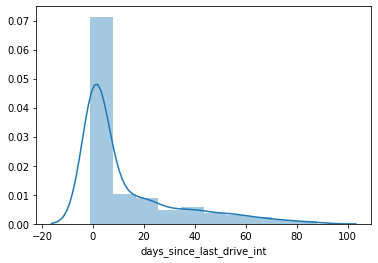

In [75]:
sns.distplot(updated_driver_data_df['days_since_last_drive_int'],bins=10)

# Data Analytics 

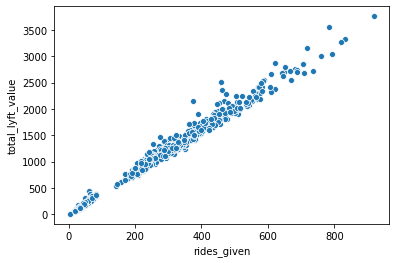

In [59]:
sns.scatterplot(data=updated_driver_data_df, x='rides_given', y='total_lyft_value')

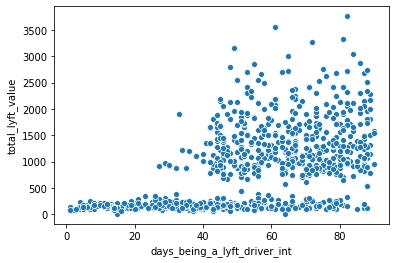

In [60]:
sns.scatterplot(data=updated_driver_data_df, x='days_being_a_lyft_driver_int', y='total_lyft_value')

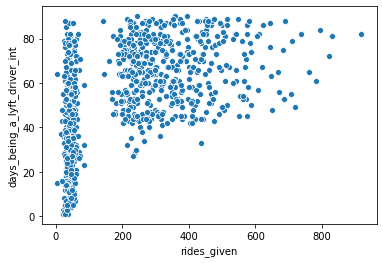

In [61]:
sns.scatterplot(data=updated_driver_data_df, x='rides_given', y='days_being_a_lyft_driver_int')

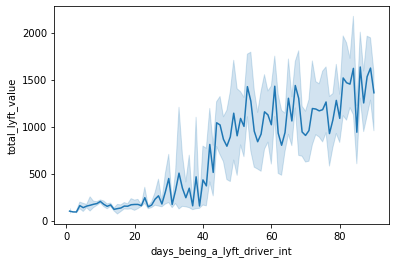

In [62]:
sns.lineplot(data=updated_driver_data_df, x='days_being_a_lyft_driver_int', y='total_lyft_value')

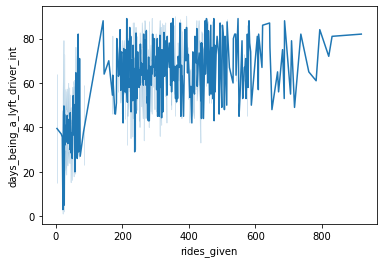

In [63]:
sns.lineplot(data=updated_driver_data_df, x='rides_given', y='days_being_a_lyft_driver_int')

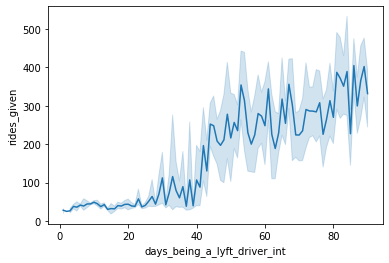

In [64]:
sns.lineplot(data=updated_driver_data_df, x='days_being_a_lyft_driver_int', y='rides_given')

# Rides given is a direct correlation to how much value a driver brings to lydt

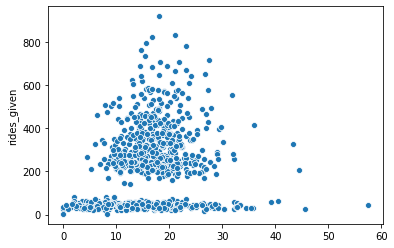

In [65]:
temp = updated_driver_data_df['total_prime_time'] / updated_driver_data_df['rides_given']
sns.scatterplot(data=updated_driver_data_df, x=temp, y='rides_given')

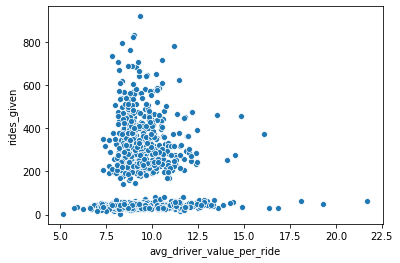

In [66]:
sns.scatterplot(data=updated_driver_data_df, x='avg_driver_value_per_ride', y='rides_given')

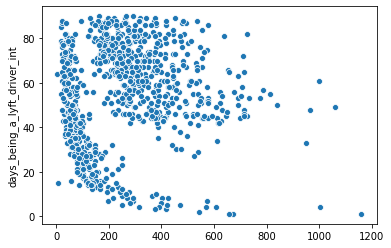

In [67]:
avg_value_a_week = updated_driver_data_df['avg_driver_value_per_ride'] * updated_driver_data_df['avg_rides_in_week']
sns.scatterplot(data=updated_driver_data_df, x=avg_value_a_week, y='days_being_a_lyft_driver_int')

In [68]:
# WANT to predict how long a driver will driver for (how many days, weeks)
# Then predict how many rides a driver will give in a day, week
# Use the projected life and the predicted amount of rides to gives the value created for lyft

# The more rides a driver gives the more value is brought to lyft

# So lets increase how many rides a driver gives

# The more money a driver makes per a ride the more rides they give

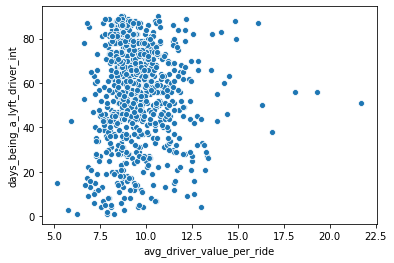

In [76]:
sns.scatterplot(data=updated_driver_data_df, x='avg_driver_value_per_ride', y='days_being_a_lyft_driver_int')

In [70]:
# The more money I make a ride the longer I drive for
# The longer I drive the more rides I give
# The more rides that are given the higher the driver value is

In [43]:
# I need to project how long a driver will drive for

# Then I need to find how that correlates with the how much money they make a ride

# 

In [44]:
# How to predict how longer a driver will drive for

In [79]:
# NEED to look at drivers rides and money made over time

#from sklearn.cluster import KMeans
#Kmean = KMeans(n_clusters=2)
#Kmean.fit(updated_driver_data_df['avg_driver_value_per_ride'])